<a href="https://colab.research.google.com/github/AIInspire/Customer-Segmentation-for-Credit-Card-Customers/blob/main/Customer_Segmentation_for_Credit_Card_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings

warnings.filterwarnings('ignore')

In [112]:
# Load the dataset
df = pd.read_csv('CC GENERAL.csv')
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [68]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [69]:
df.drop('CUST_ID', axis=1, inplace=True)

In [70]:
print(df.describe())

            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000

In [71]:
# Check for missing values
print(df.isnull().sum())

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [72]:
# Check for dublicate data
print(df.duplicated().sum())

0


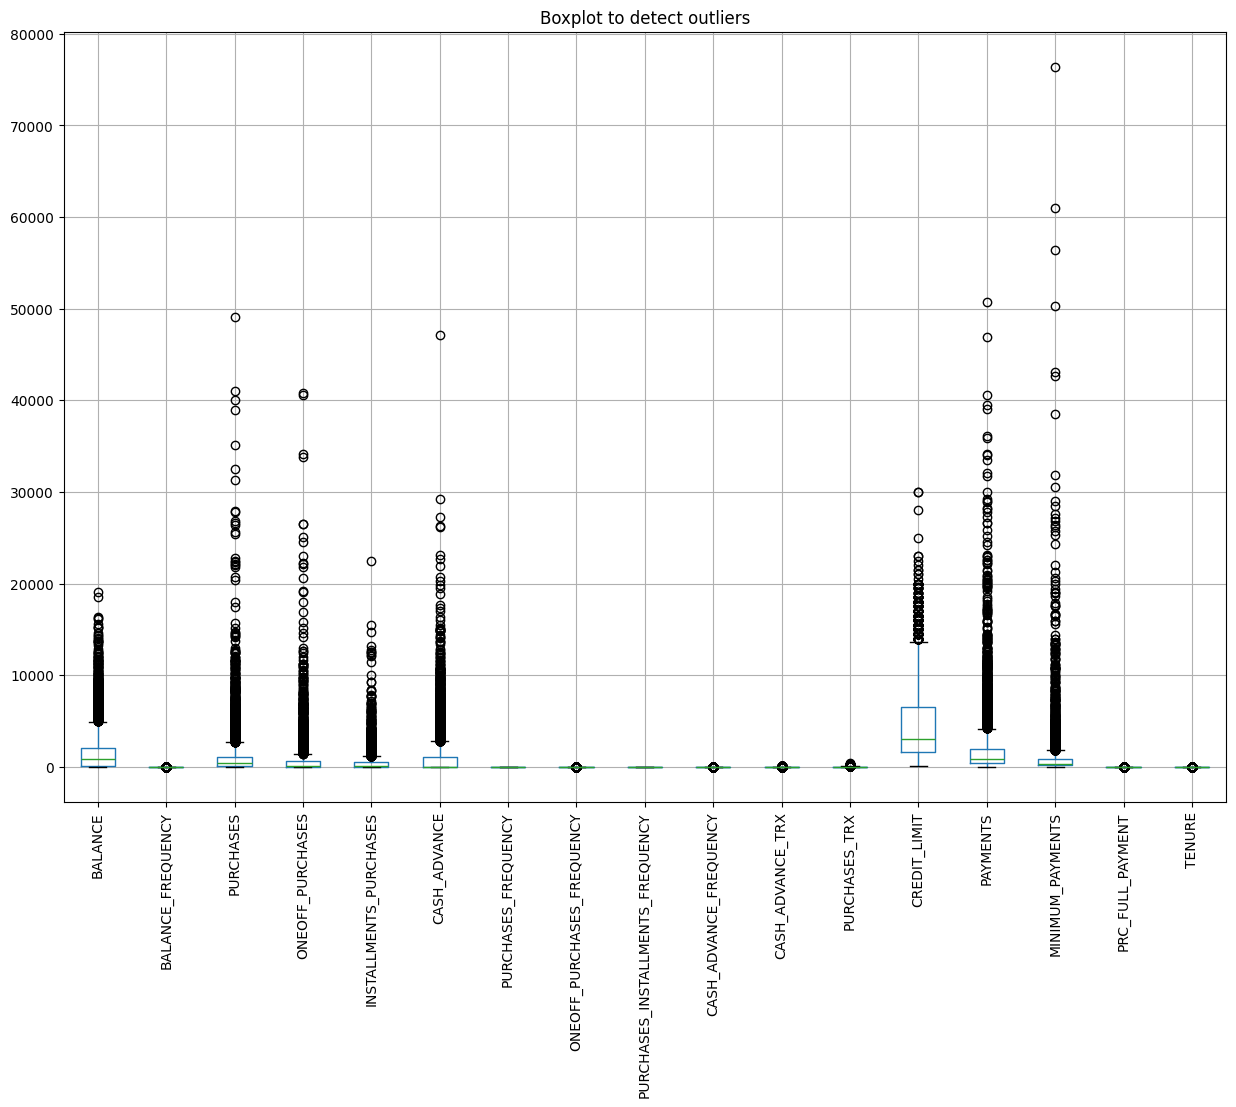

In [73]:
# Check for outliers
plt.figure(figsize=(15, 10))
df.boxplot()
plt.xticks(rotation=90)
plt.title('Boxplot to detect outliers')
plt.show()

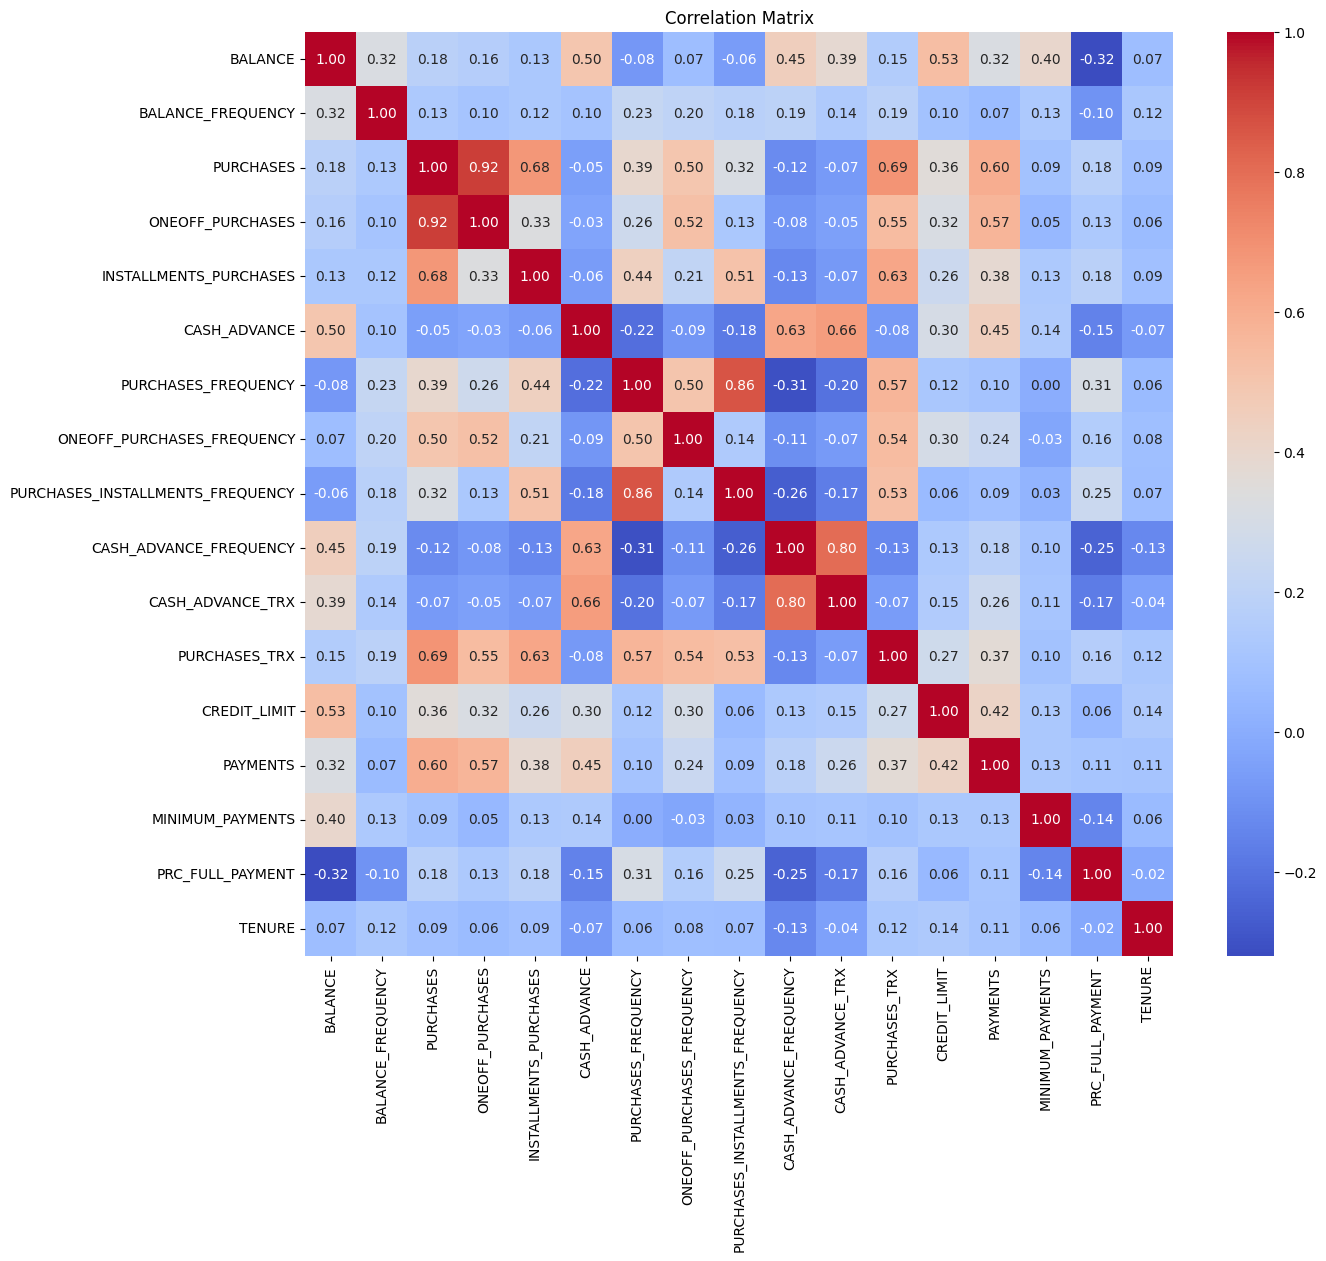

In [74]:
# Correlation analysis
plt.figure(figsize=(14, 12))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

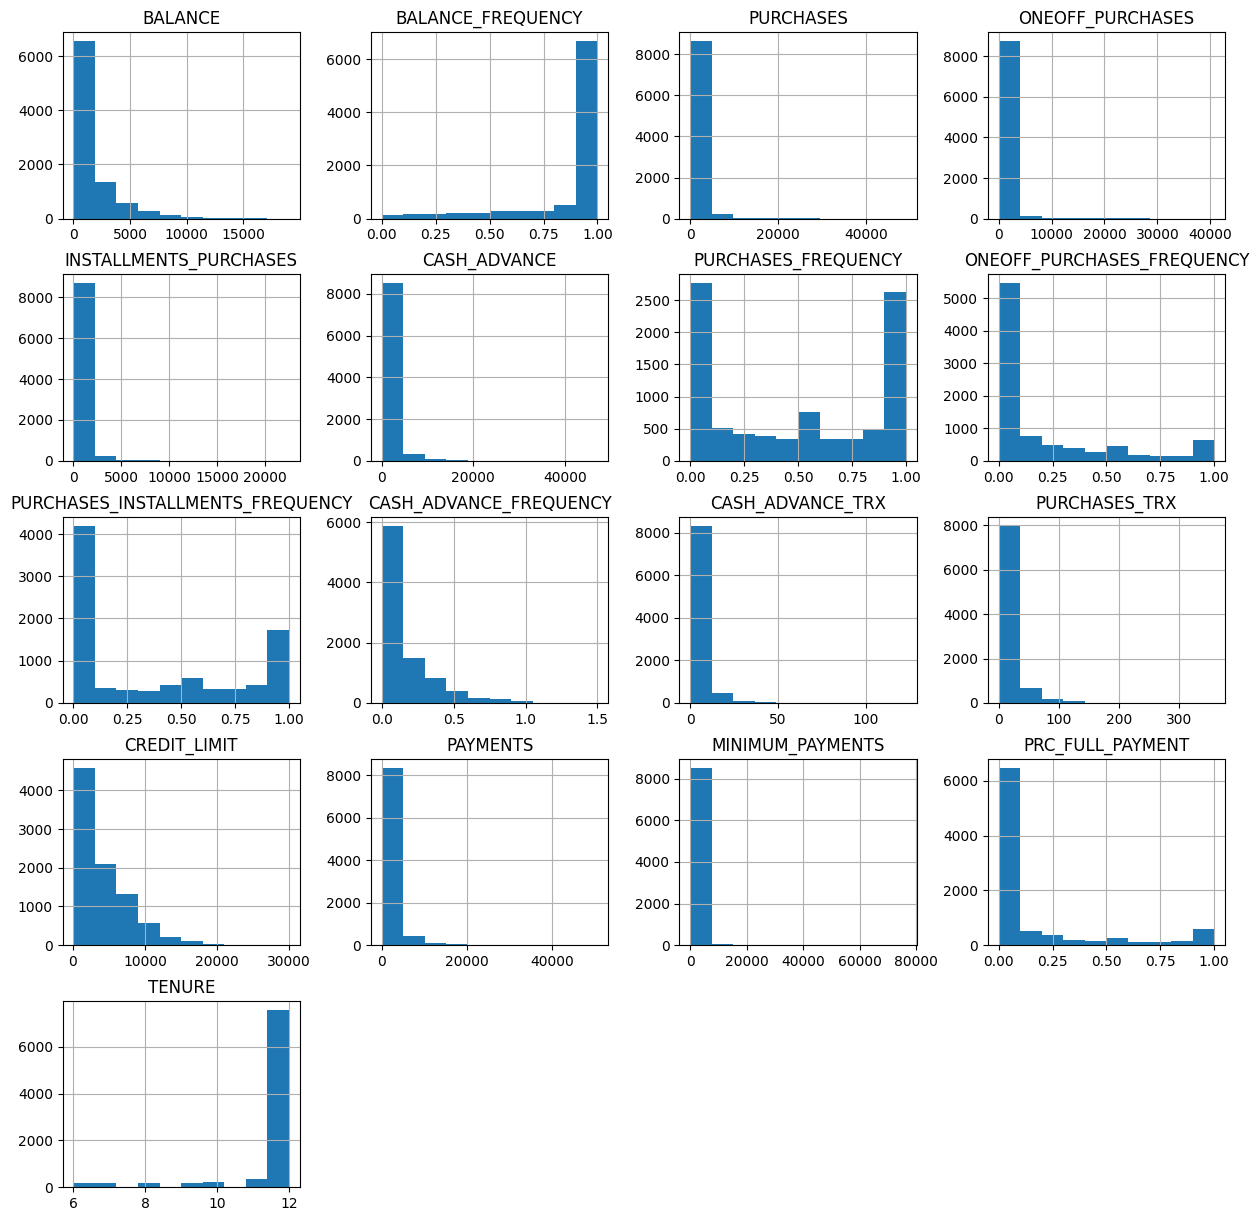

In [75]:
# Distribution of key variables
df.hist(figsize=(15,15))
plt.show()

In [76]:
clean_df = df.copy()

In [77]:
# Handle missing values with the median
clean_df.fillna(clean_df.median(), inplace=True)

# Check for missing values
clean_df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [78]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [79]:
# Feature Engineering on clean_df
EPS = 1e-5  # Small constant to avoid division by zero
clean_df['PURCHASES_RATIO'] = clean_df['PURCHASES'] / (clean_df['BALANCE'] + EPS)

clean_df['ONEOFF_PURCHASE_RATIO'] = clean_df['ONEOFF_PURCHASES'] / (clean_df['PURCHASES'] + EPS)

clean_df['INSTALLMENTS_PURCHASES_RATIO'] = clean_df['INSTALLMENTS_PURCHASES'] / (clean_df['PURCHASES'] + EPS)

clean_df['CASH_ADVANCE_RATIO'] = clean_df['CASH_ADVANCE'] / (clean_df['PURCHASES'] + EPS)

clean_df['CREDIT_UTILIZATION'] = clean_df['BALANCE'] / (clean_df['CREDIT_LIMIT'] + EPS)

clean_df['AVG_PURCHASE_VALUE'] = clean_df['PURCHASES'] / (clean_df['PURCHASES_TRX'] + EPS)

clean_df['PURCHASES_PER_TENURE'] = clean_df['PURCHASES'] / (clean_df['TENURE'] + EPS)

clean_df['PAYMENT_RATIO'] = clean_df['PAYMENTS'] / (clean_df['MINIMUM_PAYMENTS'] + EPS)

clean_df['AVG_CASH_ADVANCE_TRX'] = clean_df['CASH_ADVANCE'] / (clean_df['CASH_ADVANCE_TRX'] + EPS)

to_drop = [
    'BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY', 'PURCHASES_TRX','CREDIT_LIMIT', 'MINIMUM_PAYMENTS', 'PAYMENTS', 'TENURE', 'CASH_ADVANCE_TRX']
clean_df.drop(columns=to_drop, inplace=True)

In [80]:
clean_df.columns

Index(['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'PRC_FULL_PAYMENT', 'PURCHASES_RATIO', 'ONEOFF_PURCHASE_RATIO',
       'INSTALLMENTS_PURCHASES_RATIO', 'CASH_ADVANCE_RATIO',
       'CREDIT_UTILIZATION', 'AVG_PURCHASE_VALUE', 'PURCHASES_PER_TENURE',
       'PAYMENT_RATIO', 'AVG_CASH_ADVANCE_TRX'],
      dtype='object')

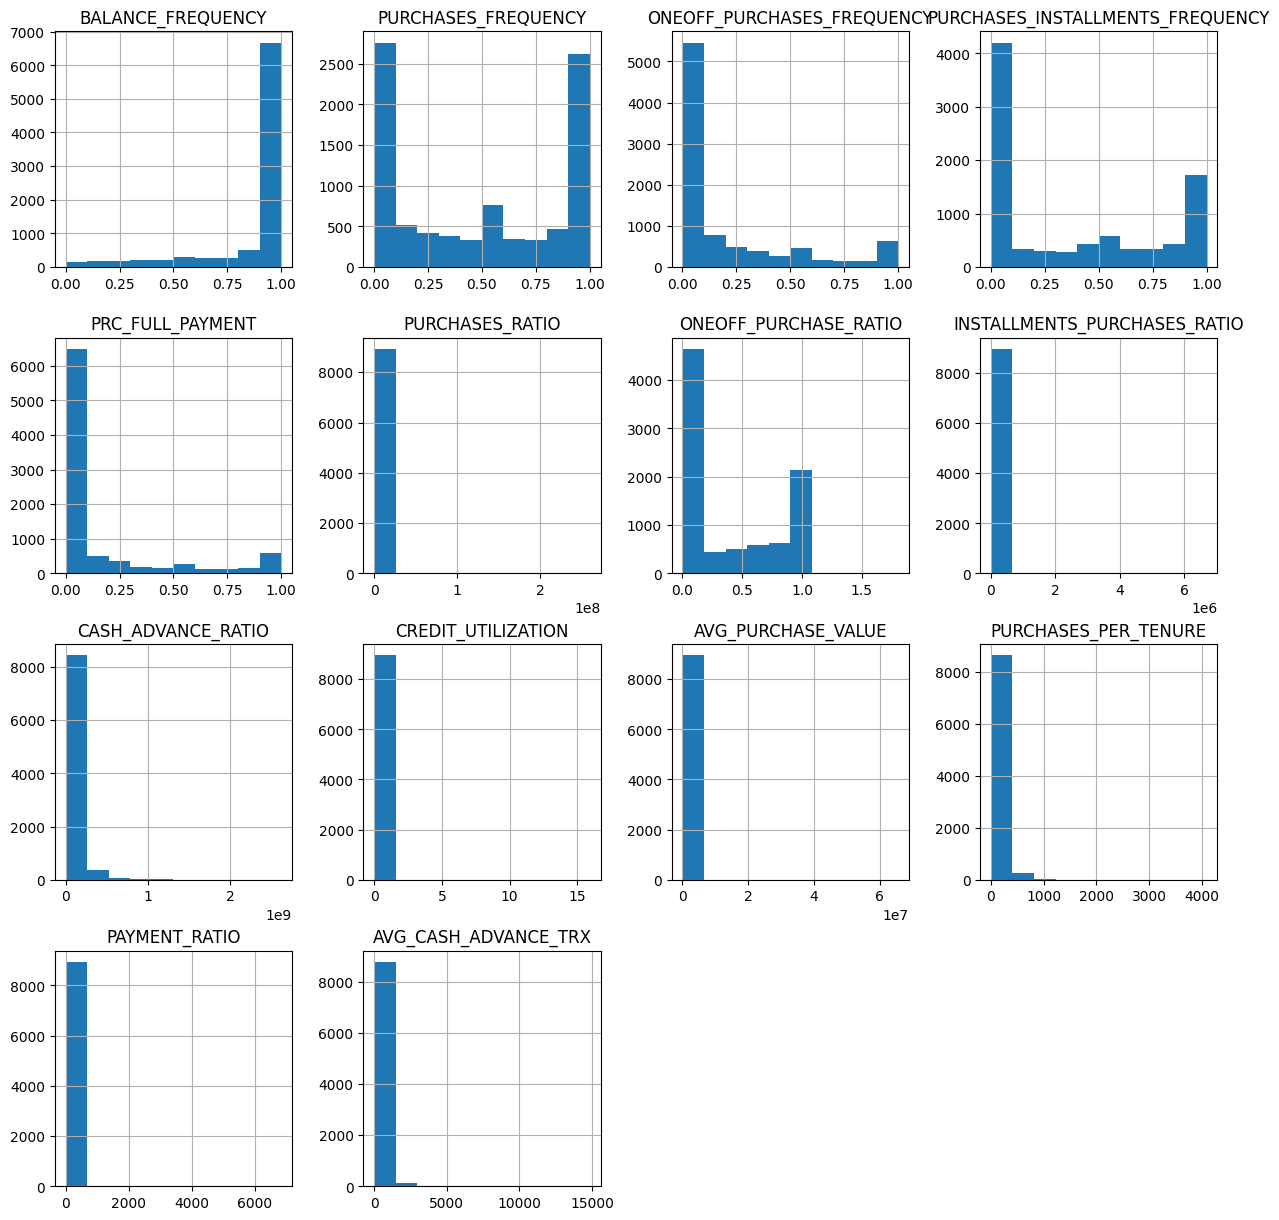

In [81]:
clean_df.hist(figsize=(15,15))
plt.show()

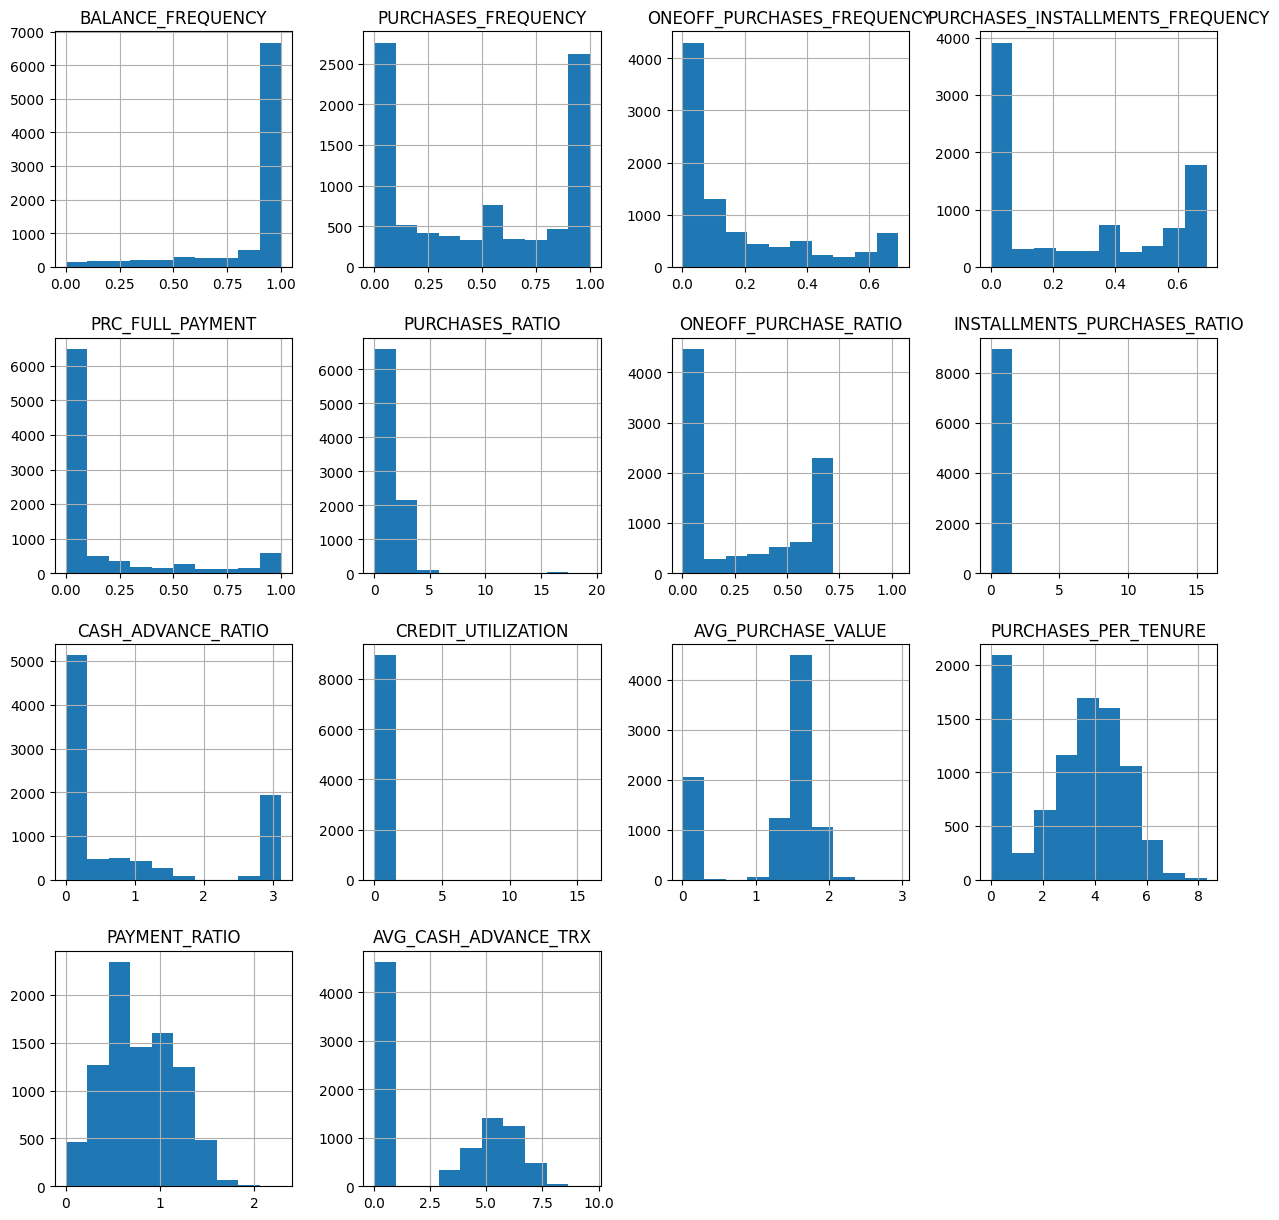

In [82]:
from scipy import stats

right_skewed_cols = [
    'PURCHASES_RATIO',
    'INSTALLMENTS_PURCHASES_RATIO',
    'CASH_ADVANCE_RATIO',
    'PAYMENT_RATIO',
    'ONEOFF_PURCHASE_RATIO',
    'AVG_PURCHASE_VALUE',
    'PURCHASES_PER_TENURE',
    'AVG_CASH_ADVANCE_TRX',
    'CASH_ADVANCE_RATIO',
    'PAYMENT_RATIO',
    'AVG_PURCHASE_VALUE'
]

for col in right_skewed_cols:
    clean_df[col] = np.log1p(clean_df[col])

zero_inflated_cols = [
    'ONEOFF_PURCHASES_FREQUENCY',
    'PURCHASES_INSTALLMENTS_FREQUENCY'
]

for col in zero_inflated_cols:
    clean_df[col] = np.log1p(clean_df[col])

def winsorize_column(series, lower=0.01, upper=0.99):
    return stats.mstats.winsorize(series, limits=[lower, upper])
'''
outlier_cols = ['CASH_ADVANCE_RATIO', 'PAYMENT_RATIO', 'AVG_PURCHASE_VALUE']
for col in outlier_cols:
    clean_df[col] = winsorize_column(clean_df[col])
'''
clean_df.hist(figsize=(15,15))
plt.show()

In [83]:
# REMOVE HIGHLY CORRELATED FEATURES
corr_matrix = clean_df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
clean_df.drop(columns=to_drop, inplace=True)

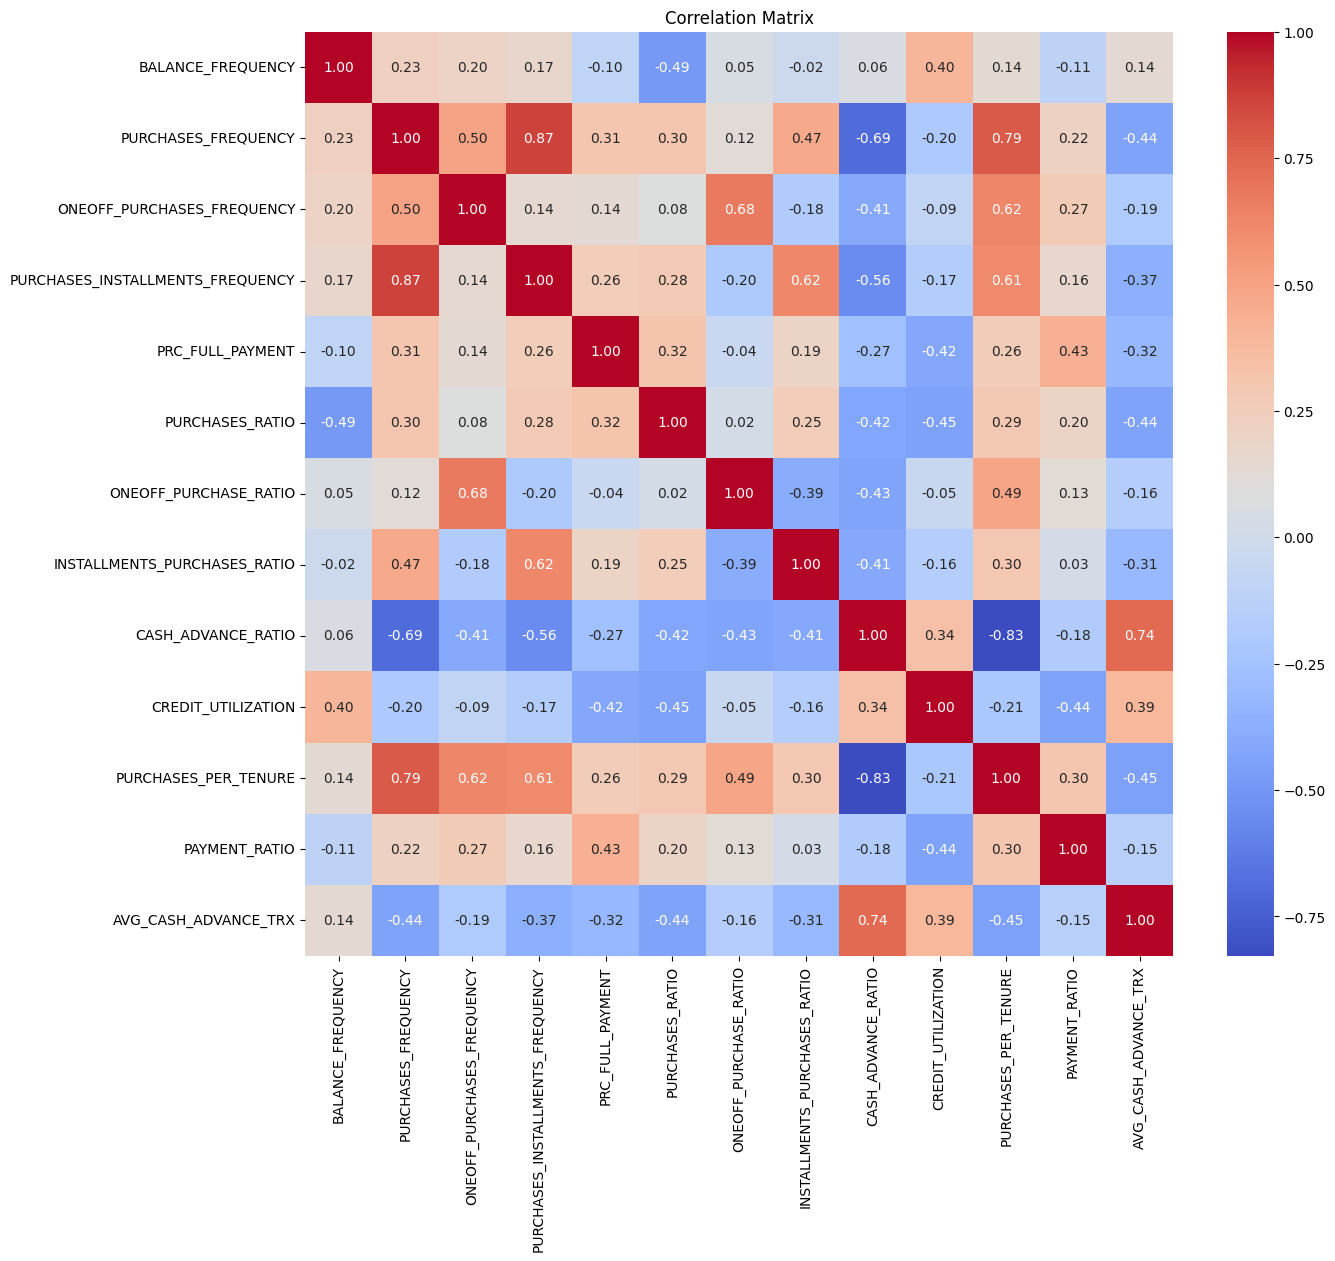

In [84]:
plt.figure(figsize=(14, 12))
correlation = clean_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

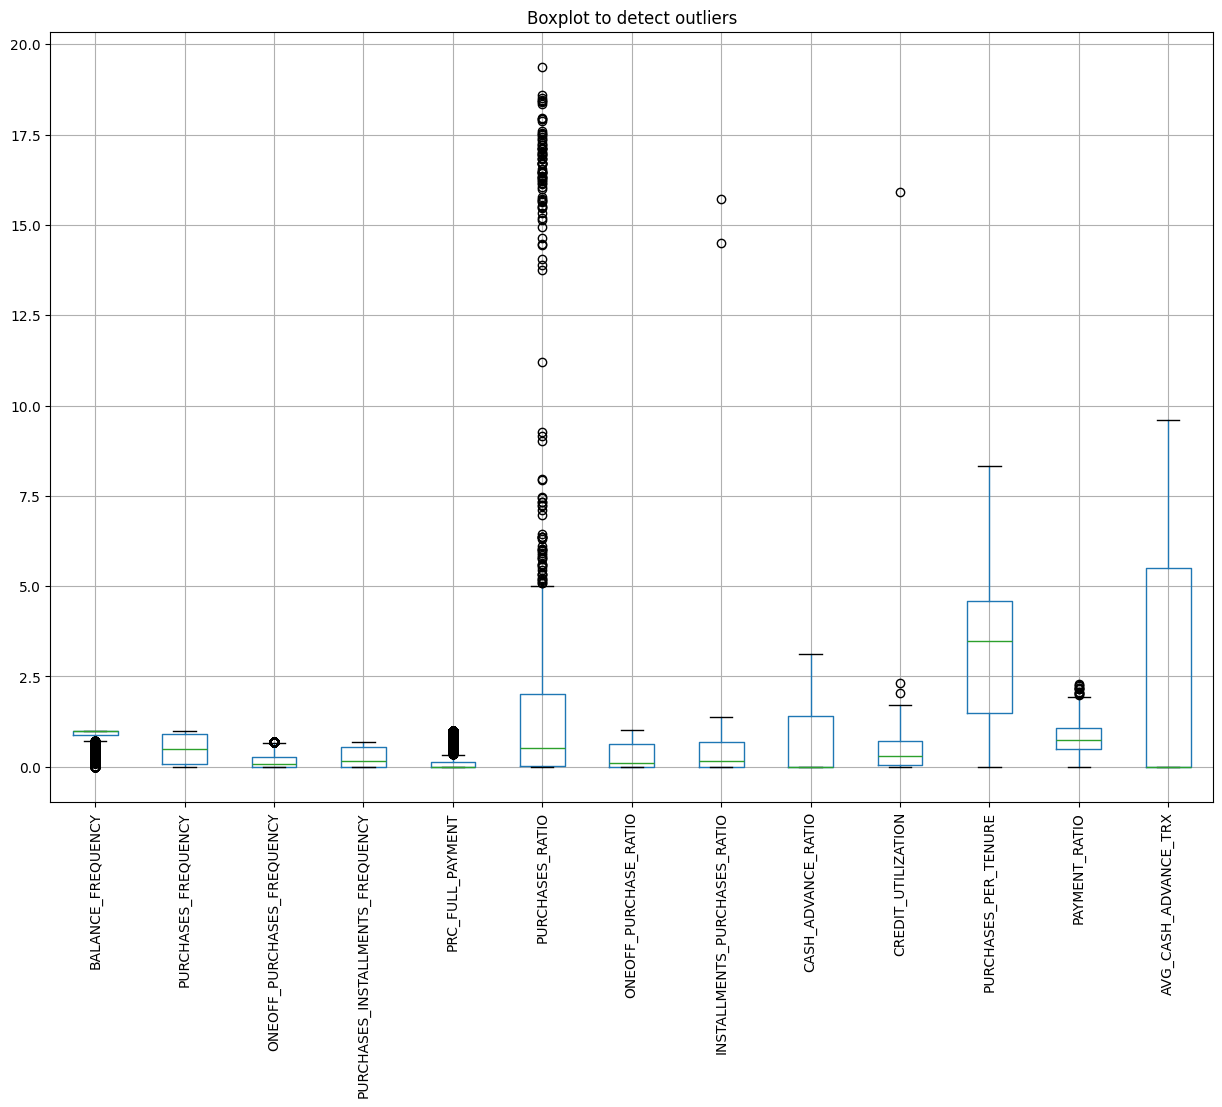

In [85]:
#boxplot
plt.figure(figsize=(15, 10))
clean_df.boxplot()
plt.xticks(rotation=90)
plt.title('Boxplot to detect outliers')
plt.show()

In [86]:
# Handle outliers
for column in clean_df.columns:
  Q1 = clean_df[column].quantile(0.25)
  Q3 = clean_df[column].quantile(0.75)
  IQR = Q3 - Q1

  upper_bound = Q3 + 1.5 * IQR
  lower_bound = Q1 - 1.5 * IQR

  clean_df[column] = np.where(clean_df[column] > upper_bound, upper_bound, clean_df[column])
  clean_df[column] = np.where(clean_df[column] < lower_bound, lower_bound, clean_df[column])

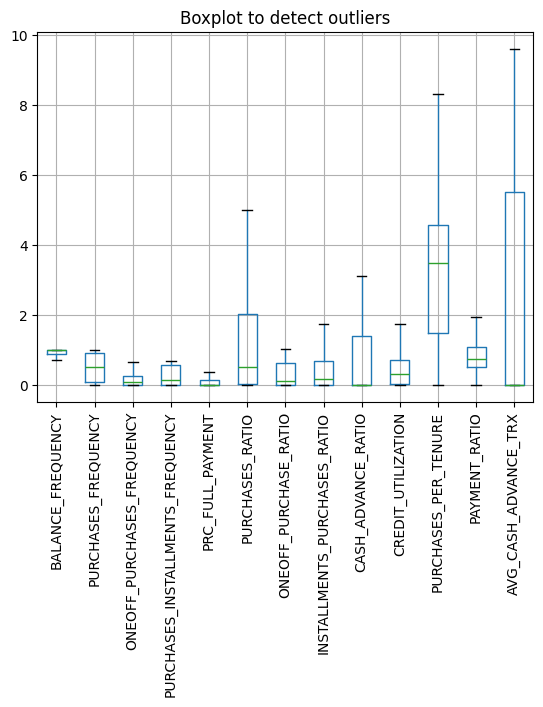

In [87]:
clean_df.boxplot()
plt.xticks(rotation=90)
plt.title('Boxplot to detect outliers')
plt.show()

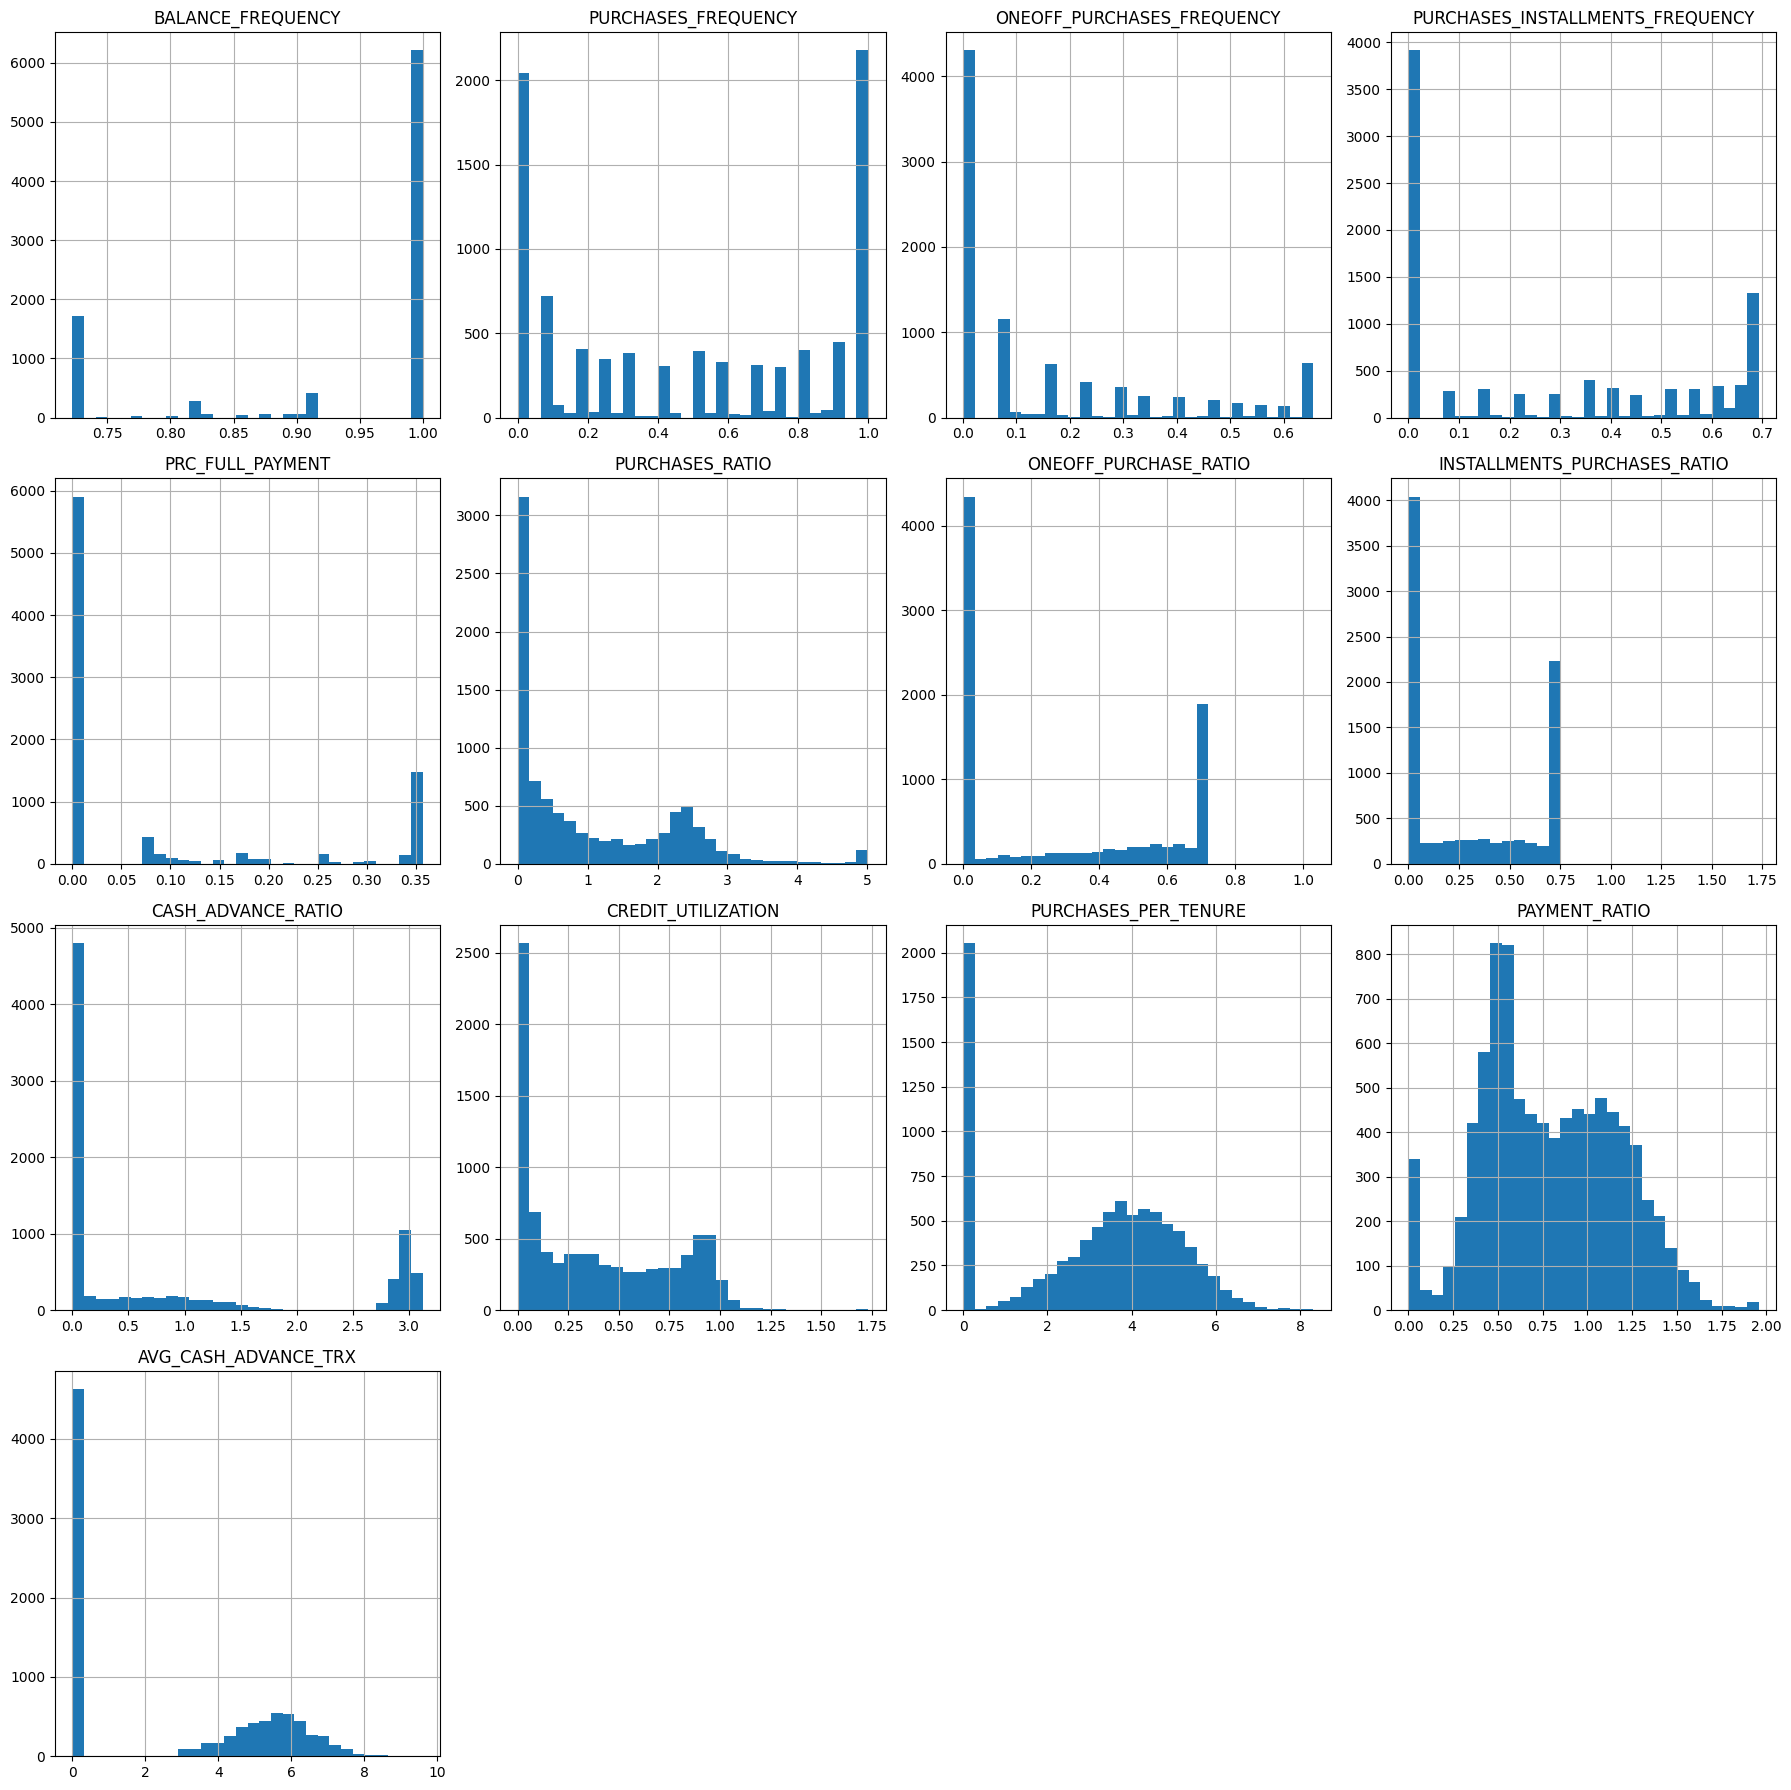

In [88]:
clean_df.hist(figsize=(18, 18), bins=30)
plt.tight_layout()
plt.show()

In [89]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
clean_df = pd.DataFrame(scaler.fit_transform(clean_df), columns=clean_df.columns)

# Display the scaled data
clean_df.head()

BALANCE_FREQUENCY  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0          -1.021875            -0.806490                   -0.739726   
1          -0.202708            -1.221758                   -0.739726   
2           0.616459             1.269843                    2.356642   
3          -1.886552            -1.014125                   -0.361868   
4           0.616459            -1.014125                   -0.361868   

   PURCHASES_INSTALLMENTS_FREQUENCY  PRC_FULL_PAYMENT  PURCHASES_RATIO  \
0                         -0.674253         -0.629277         0.153046   
1                         -0.958256          0.973961        -0.887769   
2                         -0.958256         -0.629277        -0.654372   
3                         -0.958256         -0.629277        -0.333052   
4                         -0.958256         -0.629277        -0.871014   

   ONEOFF_PURCHASE_RATIO  INSTALLMENTS_PURCHASES_RATIO  CASH_ADVANCE_RATIO  \
0              -0.920219                      1.354199           -0.719001   
1              -0.920219                     -0.948877            1.821824   
2               1.391618                     -0.948877           -0.719001   
3               1.391618                     -0.948877           -0.618450   
4               1.391617                     -0.948877           -0.719001   

   CREDIT_UTILIZATION  PURCHASES_PER_TENURE  PAYMENT_RATIO  \
0           -0.980149             -0.429030      -0.383779   
1            0.198963             -1.523373       0.425762   
2           -0.154291              0.564294      -0.687353   
3           -0.466943              0.891164      -2.071931   
4            0.832774             -1.100298       0.159603   

   AVG_CASH_ADVANCE_TRX  
0             -0.932005  
1              1.667229  
2             -0.932005  
3              0.944525  
4             -0.932005

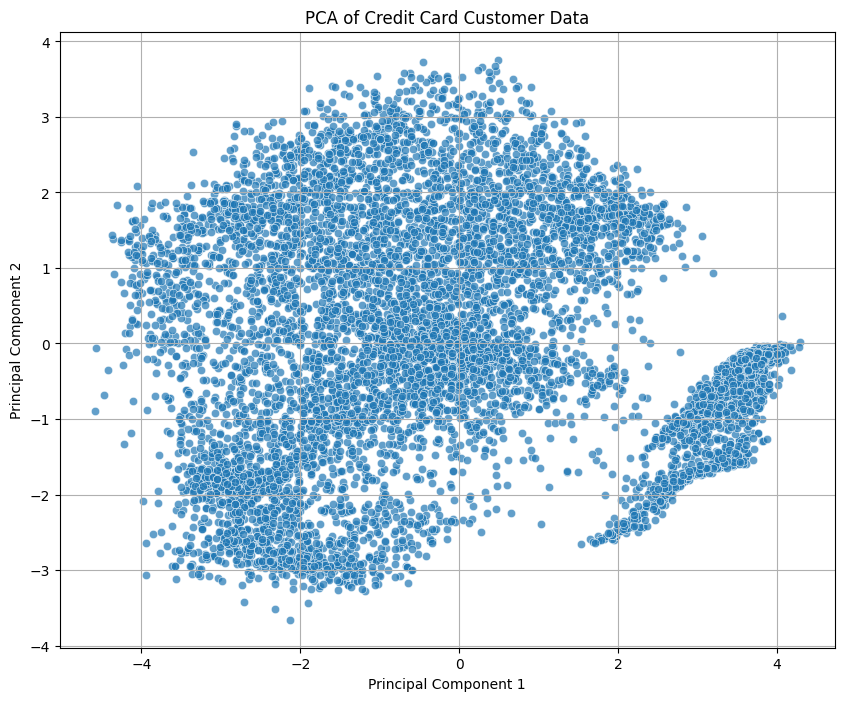

In [90]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(clean_df)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Visualize PCA components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=df_pca, alpha=0.7)
plt.title('PCA of Credit Card Customer Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

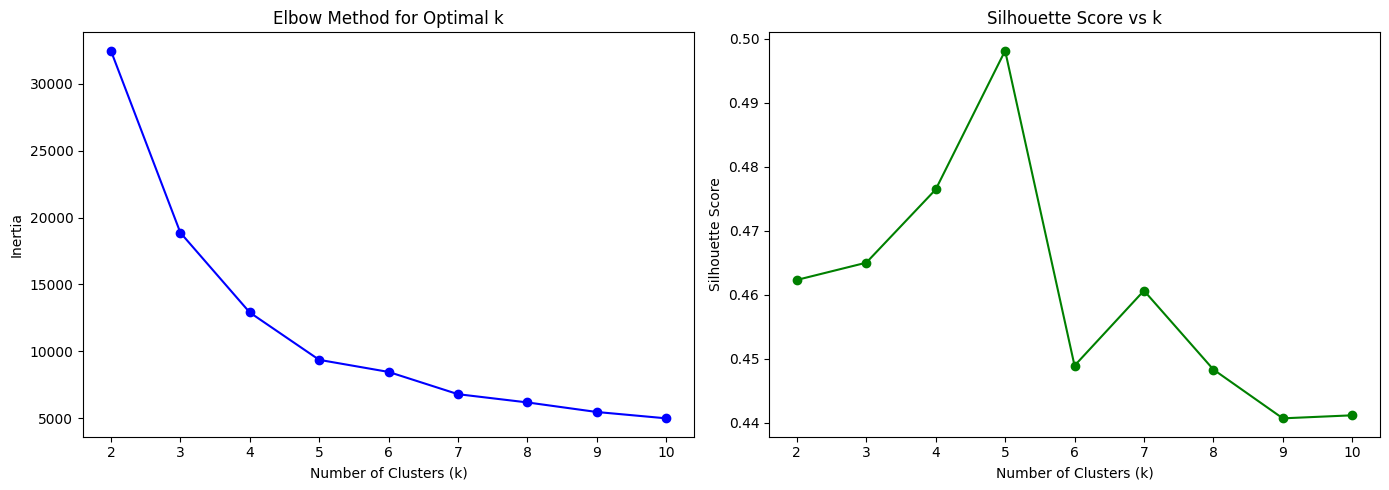

In [91]:
# Elbow Method and Silhouette Score
inertia = []
sil_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(df_pca, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_range, sil_scores, 'go-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')

plt.tight_layout()
plt.show()

In [92]:
print("K-Means Clustering Results:")
print("Best Silhouette Score:", np.max(sil_scores))
print("Optimal k:", np.argmax(sil_scores) + 2)

K-Means Clustering Results:
Best Silhouette Score: 0.49810355227892783
Optimal k: 5


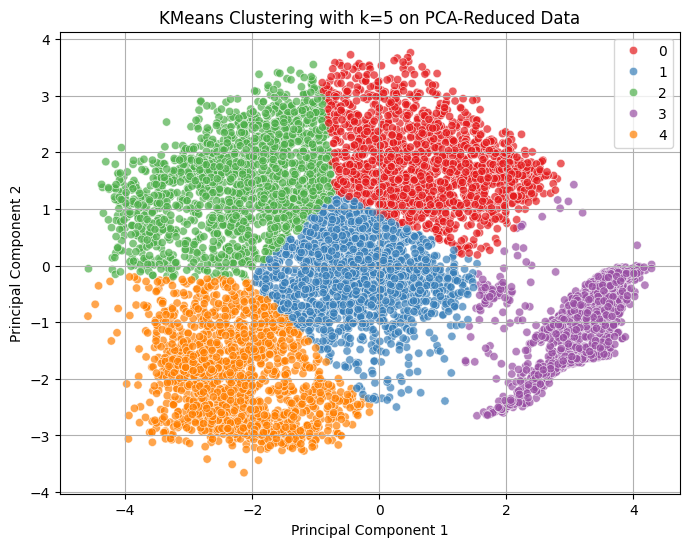

In [93]:
# Apply KMeans clustering
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(df_pca)

# Add cluster labels to PCA DataFrame
df_pca['Cluster'] = cluster_labels

# Visualize clusters in PCA-reduced 2D space
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Cluster',
    palette='Set1',
    data=df_pca,
    alpha=0.7,
    legend='full'
)
plt.title(f'KMeans Clustering with k={optimal_k} on PCA-Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


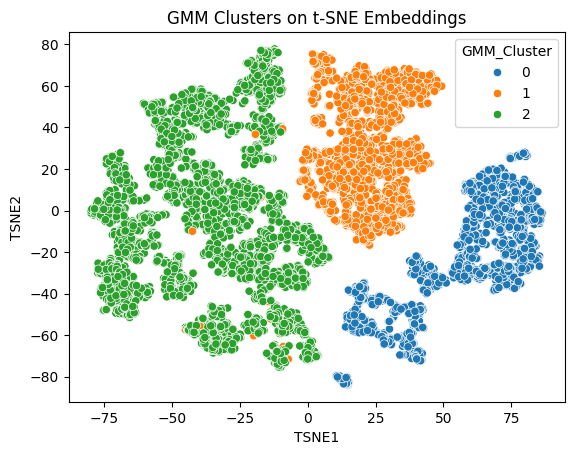

In [55]:
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture

# Standardize → t-SNE → GMM
scaler = StandardScaler()
X_scaled = scaler.fit_transform(clean_df.select_dtypes(include=['float64', 'int64']))

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])

# GMM
gmm = GaussianMixture(n_components=3, random_state=42)
tsne_df['GMM_Cluster'] = gmm.fit_predict(X_scaled)  # Or use X_tsne for 2D-only clustering

# Plot
sns.scatterplot(x='TSNE1', y='TSNE2', hue='GMM_Cluster', data=tsne_df, palette='tab10')
plt.title('GMM Clusters on t-SNE Embeddings')
plt.show()

In [63]:
hard_clusters = gmm.predict(X_scaled)  # Hard assignments

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X_scaled, hard_clusters)
print("GMM Clustering Results:")
print(f"Silhouette Score (Hard Clusters): {silhouette_avg:.3f}")

GMM Clustering Results:
Silhouette Score (Hard Clusters): 0.216


**Sample Analysis: Comparing GMM and K-Means Clustering Performance**

Overview of Results
1. Gaussian Mixture Model (GMM)

  * Silhouette Score: 0.216

  * Interpretation: The score indicates weak clustering structure, with some overlap between clusters.

2. K-Means

  * Best Silhouette Score: 0.498 (at k=5)

  * Interpretation: Moderate to strong clustering structure, with better-defined separation between clusters compared to GMM.

# Visualization and Analysis

         BALANCE_FREQUENCY  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
Cluster                                                                       
0                -0.132487            -0.468859                    0.294815   
1                 0.513601             0.682136                   -0.347592   
2                 0.027720            -1.205464                   -0.737216   
3                -0.731441             0.544207                   -0.596851   
4                 0.408450             1.053666                    1.717833   

         PURCHASES_INSTALLMENTS_FREQUENCY  PRC_FULL_PAYMENT  PURCHASES_RATIO  \
Cluster                                                                        
0                               -0.780992         -0.416982        -0.182316   
1                                0.904436         -0.541891        -0.471726   
2                               -0.942282         -0.387962        -0.886181   
3                                0.771166     

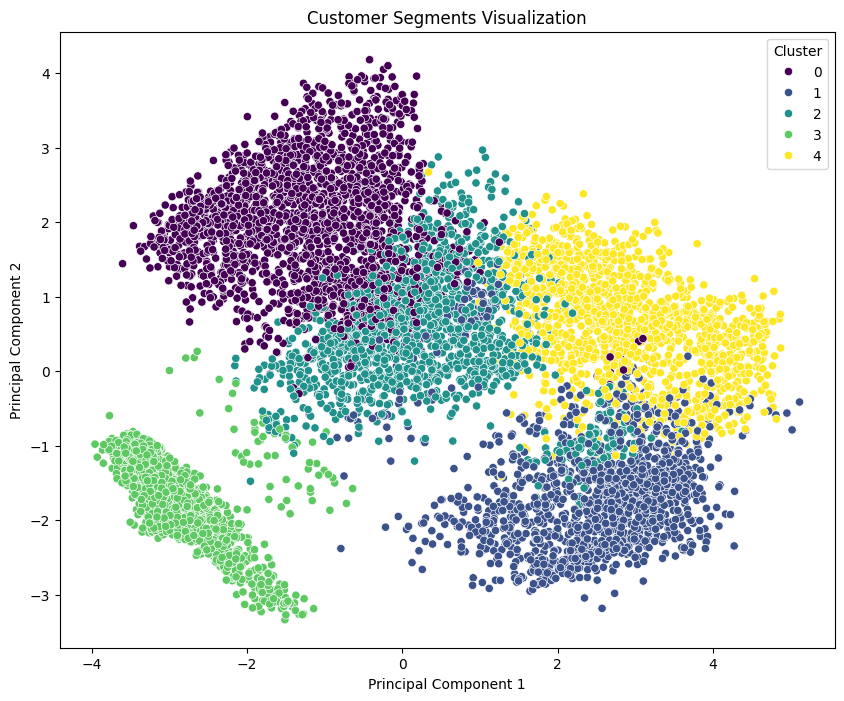

In [110]:
# Analyze cluster characteristics

clean_df['Cluster'] = kmeans.fit_predict(clean_df)
df.head()
cluster_analysis = clean_df.groupby('Cluster').mean()
print(cluster_analysis)

# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(clean_df)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster']

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('Customer Segments Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# 🔍 Cluster Interpretation Summary

## Cluster 0: Mixed Behavior – One-off Spenders
* 🔼 High: ONEOFF_PURCHASE_RATIO, CREDIT_UTILIZATION (slightly), PURCHASES_PER_TENURE

* 🔽 Low: PURCHASES_FREQUENCY, INSTALLMENTS_PURCHASES_RATIO

* 📝 Insight: This group tends to make larger one-off purchases rather than installment purchases, and they use a moderate portion of their credit limit.

## Cluster 1: Disciplined Full Payers
* 🔼 High: PRC_FULL_PAYMENT, PURCHASES_RATIO, INSTALLMENTS_PURCHASES_RATIO, PURCHASES_FREQUENCY, PAYMENT_RATIO

* 🔽 Low: CREDIT_UTILIZATION, CASH_ADVANCE_RATIO, AVG_CASH_ADVANCE_TRX

* 📝 Insight: This group uses installment-based purchasing, pays their balances in full, and avoids cash advances, suggesting financial discipline.

## Cluster 2: Active Installment Shoppers
* 🔼 High: PURCHASES_FREQUENCY, INSTALLMENTS_PURCHASES_RATIO, PURCHASES_PER_TENURE

* 🔽 Low: PRC_FULL_PAYMENT, ONEOFF_PURCHASE_RATIO, CASH_ADVANCE_RATIO

* 📝 Insight: These users make frequent purchases via installments but rarely pay in full. They tend to avoid one-off purchases and cash advances.

## Cluster 3: Heavy Cash Advance Users
* 🔼 High: CASH_ADVANCE_RATIO, AVG_CASH_ADVANCE_TRX, CREDIT_UTILIZATION

* 🔽 Low: Almost all purchase-related features, especially PURCHASES_PER_TENURE, PURCHASES_FREQUENCY, PRC_FULL_PAYMENT

* 📝 Insight: This group relies heavily on cash advances, seldom makes purchases, and has low repayment behavior—potentially financially stressed users.

## Cluster 4: Engaged Multi-Mode Users
* 🔼 High: ONEOFF_PURCHASES_FREQUENCY, PRC_FULL_PAYMENT, PURCHASES_RATIO, PURCHASES_PER_TENURE, PAYMENT_RATIO

* 🔽 Low: CREDIT_UTILIZATION, AVG_CASH_ADVANCE_TRX

* 📝 Insight: These users engage in both installment and one-off purchases, frequently use their cards, and pay well. They maintain healthy usage and repayment habits with minimal reliance on cash advances.

## 📌 Summary Table

| Cluster | Behavior Summary                   | Financial Traits                              |
| ------- | ---------------------------------- | --------------------------------------------- |
| 0       | One-off Spenders                   | Moderate utilization, low full payment rate   |
| 1       | Disciplined Full Payers            | High repayment, low utilization, avoids cash  |
| 2       | Frequent Installment Shoppers      | Active but low repayment, avoids one-off/cash |
| 3       | Heavy Cash Advance Users           | Financially stressed, high utilization        |
| 4       | Balanced, High-Value Engaged Users | Strong all-round usage and repayment behavior |


In [114]:
# Assuming 'df' is your original DataFrame and 'clean_df' is your processed DataFrame
# Reset index of clean_df if it was modified during processing (e.g., during scaling)
df.drop(columns='CUST_ID', inplace=True)
df = df.fillna(df.median()).reset_index(drop=True)

clean_df_reset = clean_df.reset_index(drop=True)
df_reset = df.reset_index(drop=True)

# Concatenate the two dataframes
# Using axis=1 to concatenate columns
concatenated_df = pd.concat([df_reset, clean_df_reset], axis=1)

# Drop duplicate columns
# Identify columns that appear more than once
duplicate_columns = concatenated_df.columns[concatenated_df.columns.duplicated(keep='first')]

# Drop the identified duplicate columns
final_df = concatenated_df.drop(columns=duplicate_columns)

# Display the first few rows of the final DataFrame and its info to verify
print("Concatenated and cleaned DataFrame:")
print(final_df.head())
print("\nInfo of the final DataFrame:")
print(final_df.info())

Concatenated and cleaned DataFrame:
       BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0    40.900749      95.40              0.00                    95.4   
1  3202.467416       0.00              0.00                     0.0   
2  2495.148862     773.17            773.17                     0.0   
3  1666.670542    1499.00           1499.00                     0.0   
4   817.714335      16.00             16.00                     0.0   

   CASH_ADVANCE  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
0      0.000000                0.000000                 0              2   
1   6442.945483                0.250000                 4              0   
2      0.000000                0.000000                 0             12   
3    205.788017                0.083333                 1              1   
4      0.000000                0.000000                 0              1   

   CREDIT_LIMIT     PAYMENTS  ...  TENURE  PURCHASES_RATIO  \
0        1000.0   

In [116]:
final_df['Cluster'] = kmeans.fit_predict(final_df)
df.head()
cluster_analysis = final_df.groupby('Cluster').mean()

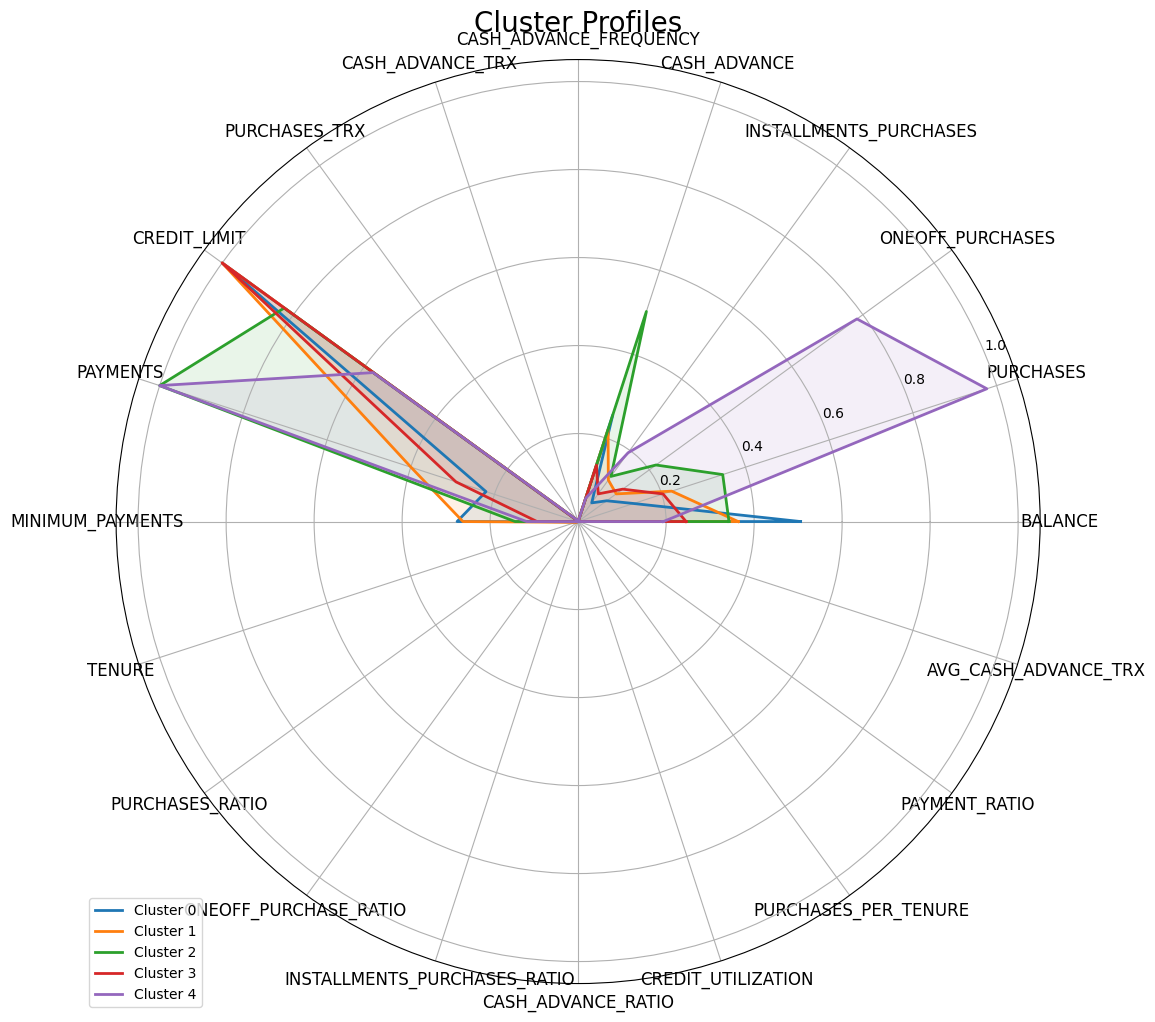

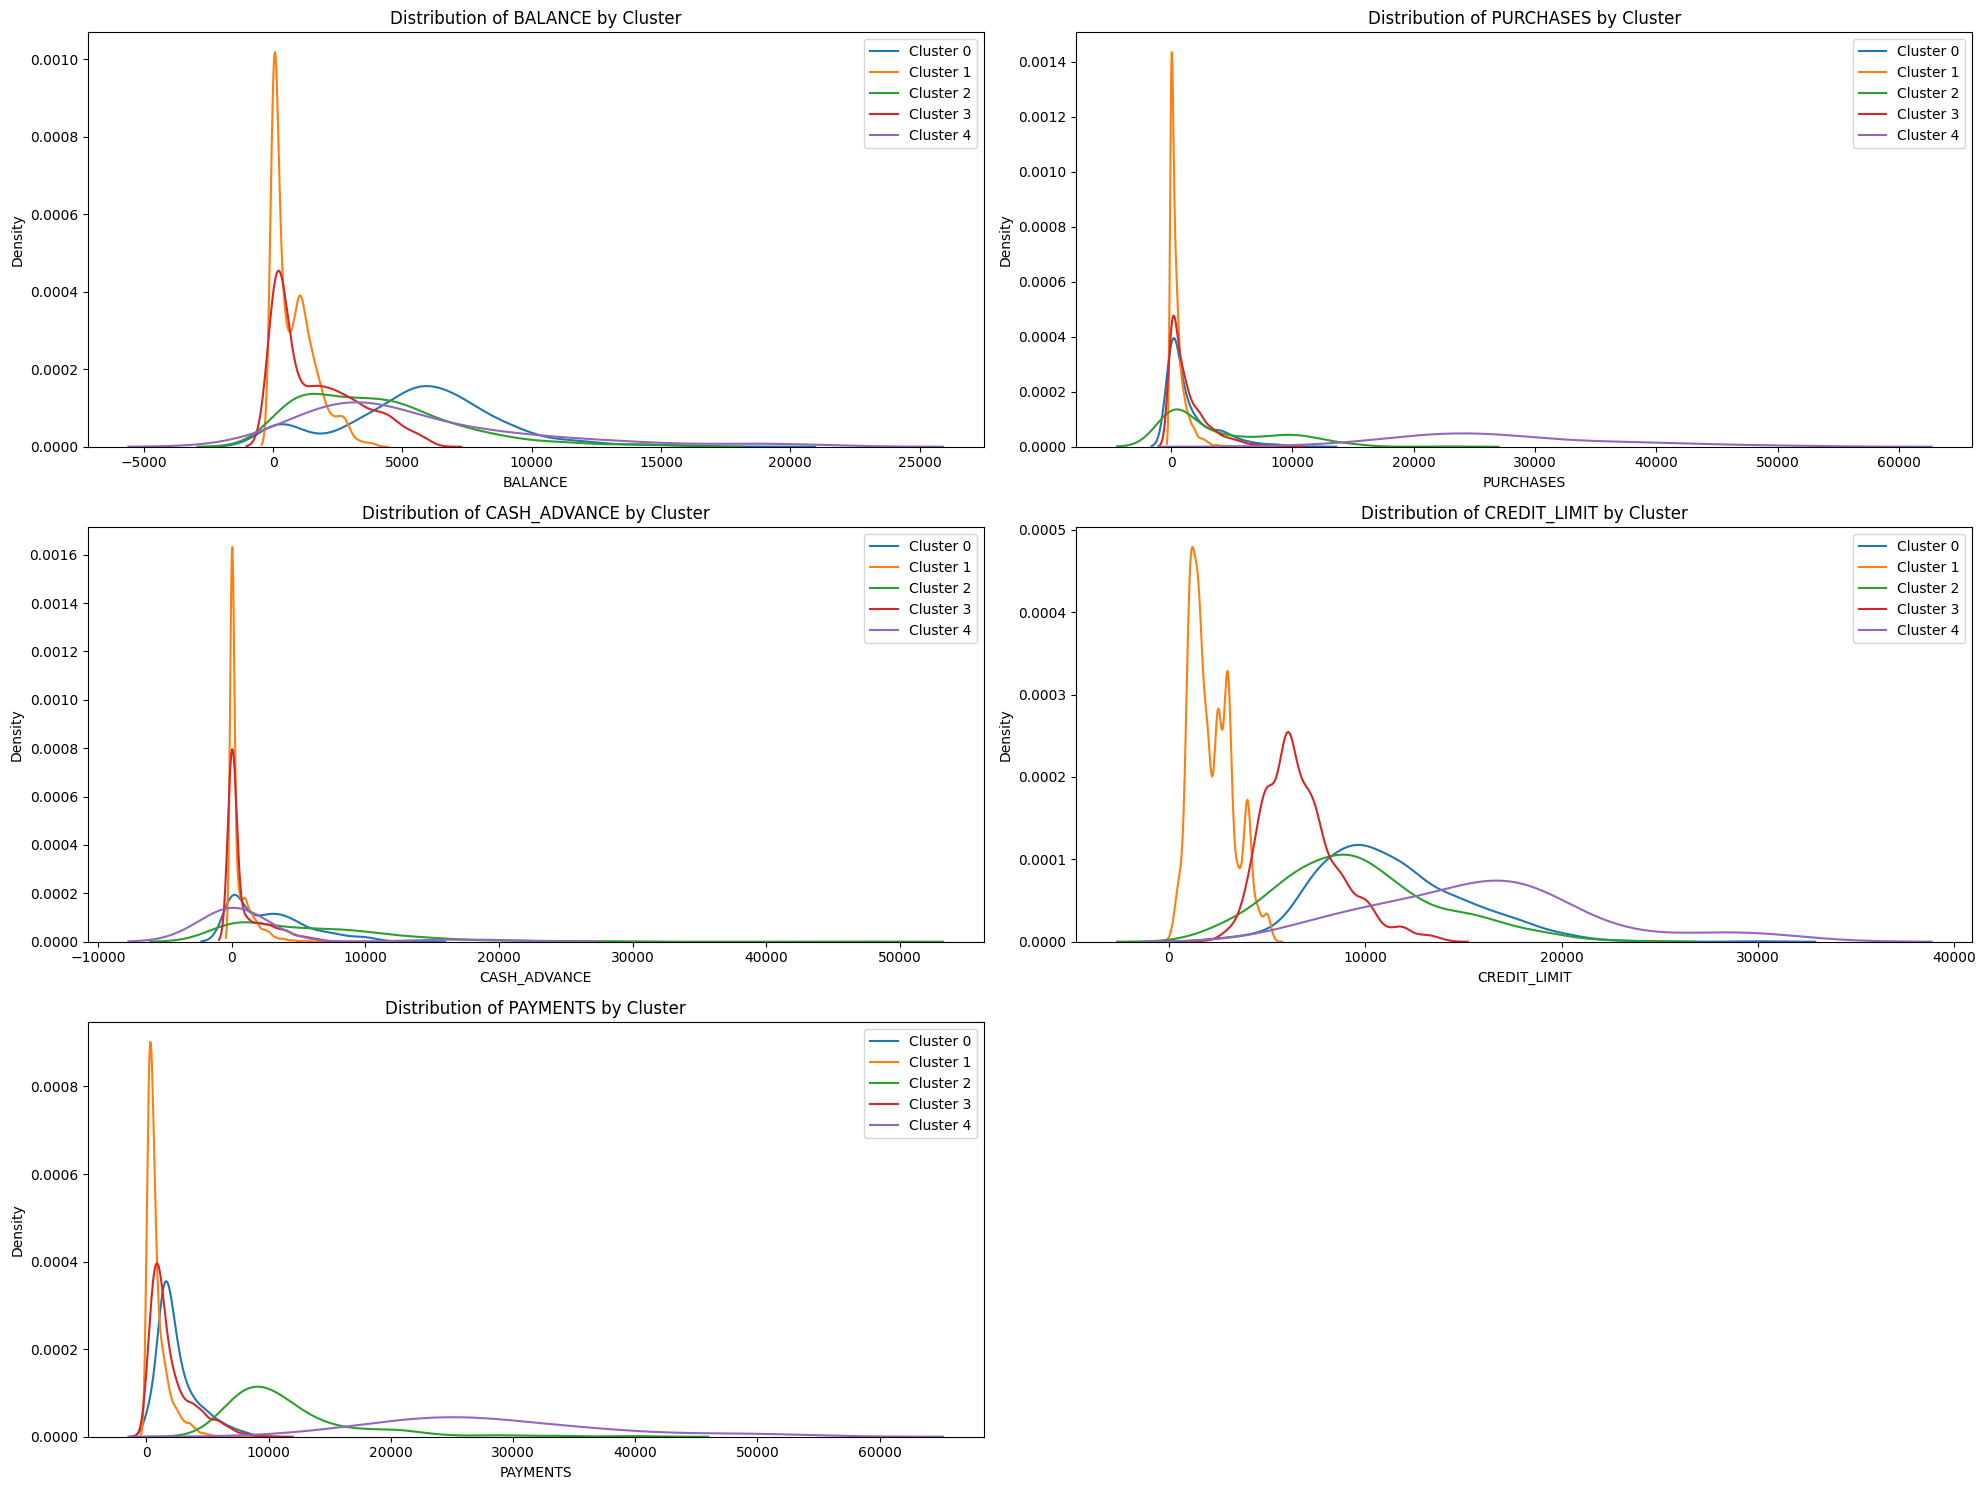

<Figure size 1500x1000 with 0 Axes>

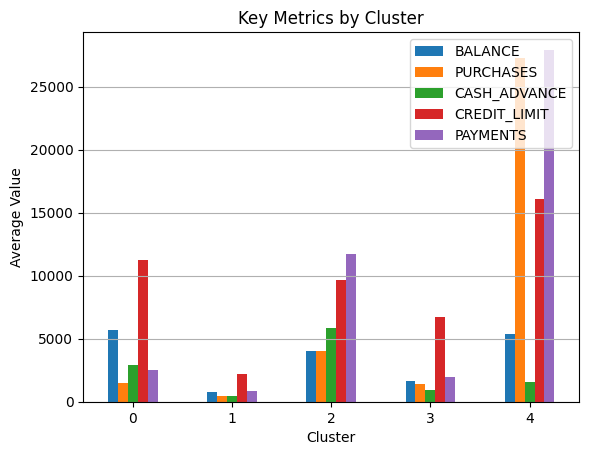

In [117]:
# Radar chart for cluster profiles
def radar_chart(df_mean):
    categories = list(df_mean.index)
    N = len(categories)

    # Create angle values for each category
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Close the loop

    # Create figure
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))

    # Draw one axis per variable and add labels
    plt.xticks(angles[:-1], categories, size=12)

    # Draw the chart for each cluster
    for i in range(len(df_mean.columns)):
        values = df_mean[i].values.tolist()
        values += values[:1]  # Close the loop
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Cluster {i}')
        ax.fill(angles, values, alpha=0.1)

    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title('Cluster Profiles', size=20, pad=20)
    plt.show()

# Prepare data for radar chart
cluster_means = cluster_analysis.T
# Normalize the data for the radar chart
normalized_means = (cluster_means - cluster_means.min()) / (cluster_means.max() - cluster_means.min())
radar_chart(normalized_means)

# Distribution of key features by cluster
key_features = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']
plt.figure(figsize=(20, 15))
for i, feature in enumerate(key_features):
    plt.subplot(3, 2, i+1)
    for cluster in range(optimal_k):
        sns.kdeplot(final_df[final_df['Cluster'] == cluster][feature], label=f'Cluster {cluster}')
    plt.title(f'Distribution of {feature} by Cluster')
    plt.legend()
plt.tight_layout()
plt.show()

# Bar chart for average values of key metrics by cluster
plt.figure(figsize=(15, 10))
cluster_analysis[key_features].plot(kind='bar')
plt.title('Key Metrics by Cluster')
plt.ylabel('Average Value')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.grid(axis='y')
plt.show()